Hii this is SuperMarket sales Analysis Project and i have Analyzed and found some 7 important insights out of this. Those insights can be benificial for the growth of this particular supermarket. you can see all the analysis down the line. also i tried to predict tax from this dataset using linear regression and random forest regressor models which can be useful in some other way. Check this as Analysis part of my work and i will still work on Machine Learning part of this project and try to upload some other versions of my work as well. this analysis will be super useful .. 

Have a look and Upvote if you got any useful insights.

Checkout my profile : https://www.kaggle.com/informrohit1

# Import Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from scipy.stats import skew, kurtosis

# Import Dataset

In [2]:
data = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv',usecols=['Branch','City','Customer type','Gender','Product line','Unit price','Quantity','Tax 5%',
                                                   'Total','Time','Date','Payment','Rating'])

In [3]:
data

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,4.1


# Data Preprocessing 

In [4]:
data.nunique()

Branch             3
City               3
Customer type      2
Gender             2
Product line       6
Unit price       943
Quantity          10
Tax 5%           990
Total            990
Date              89
Time             506
Payment            3
Rating            61
dtype: int64

In [5]:
data.isnull().sum()

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [6]:
data.isna().sum()

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Date           1000 non-null   object 
 10  Time           1000 non-null   object 
 11  Payment        1000 non-null   object 
 12  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [9]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000


# Ckeck for Outliers

In [10]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Unit price'],name='Unit Price'))
fig.add_trace(go.Box(y=data['Quantity'] , name='Quantity'))
fig.add_trace(go.Box(y=data['Tax 5%'], name='Tax'))
fig.add_trace(go.Box(y=data['Rating'], name='Rating'))

fig.update_layout(title="Box Plots for Respective Columns", yaxis_title="...")
fig.show()

In [11]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Tax 5%'], name='Tax'))
fig.update_layout(title="Tax", yaxis_title="...")
fig.show()

Preprocessing Tax column as here we found some Outliers

In [12]:
quartile1 = data['Tax 5%'].quantile(0.25)
quartile1

5.924875

In [13]:
quartile3 = data['Tax 5%'].quantile(0.75)
quartile3

22.44525

In [14]:
quartile2 = data['Tax 5%'].quantile(0.5)
quartile2

12.088000000000001

In [15]:
quartile_range = quartile3 - quartile1
quartile_range

16.520375

In [16]:
skewness = skew(data['Tax 5%'])
skewness

0.8912303920037635

In [17]:
kurtosis = data['Tax 5%'].kurtosis()
kurtosis

-0.0818847579043509

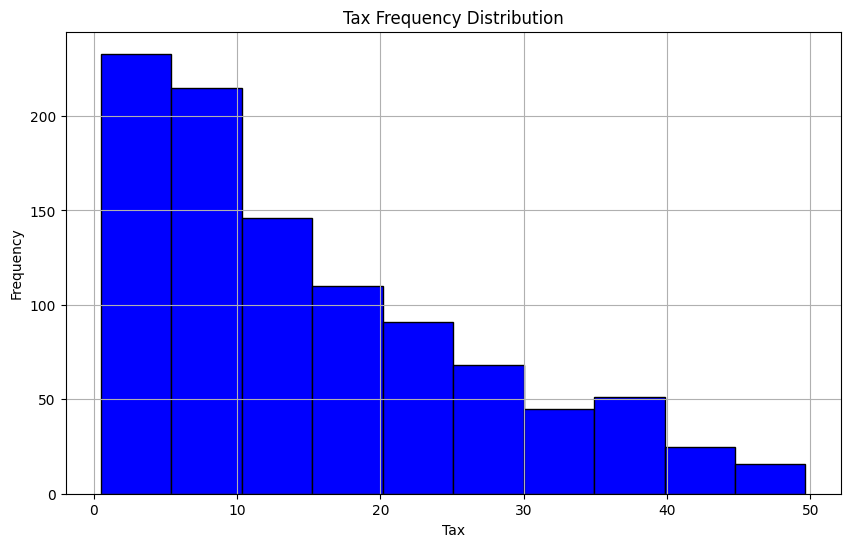

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(data['Tax 5%'], bins=10, color='blue', edgecolor='black')

# Customize the chart
plt.title('Tax Frequency Distribution')
plt.xlabel('Tax')
plt.ylabel('Frequency')
plt.grid(True)

# Outliers in Total cost 

In [19]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Total'], name='Total'))
fig.update_layout(title="Grand Total", yaxis_title="...")
fig.show()

Preprocessing Total Column as there also we found some Outliers

In [20]:
q1 = data['Total'].quantile(0.25)
q1

124.422375

In [21]:
q2 = data['Total'].quantile(0.5)
q2

253.848

In [22]:
q3 = data['Total'].quantile(0.75)
q3

471.35024999999996

In [23]:
IR = q3 - q1
IR

346.927875

In [24]:
skew_ = skew(data['Total'])
skew_

0.8912303920037631

In [25]:
k = data['Total'].kurtosis()
k

-0.08188475790435135

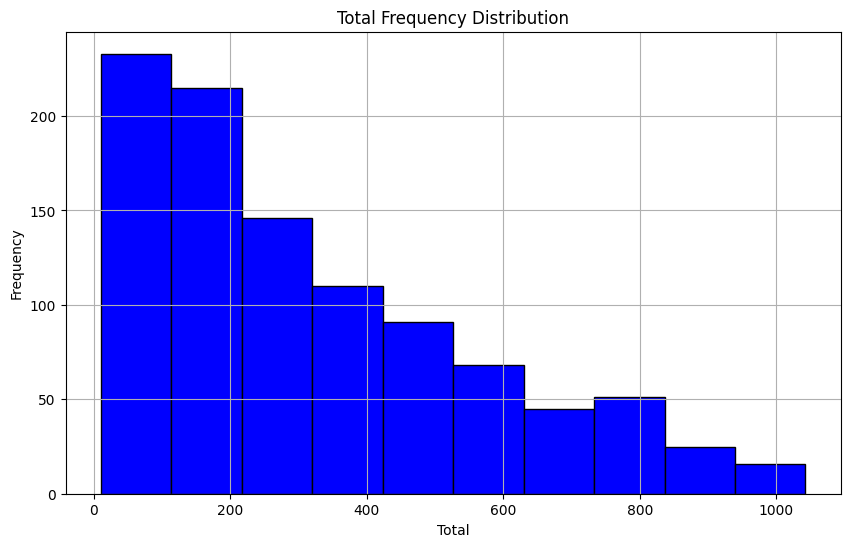

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(data['Total'], bins=10, color='blue', edgecolor='black')

# Customize the chart
plt.title('Total Frequency Distribution')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.grid(True)

Text(0.5, 1.0, 'Simple Bar Chart')

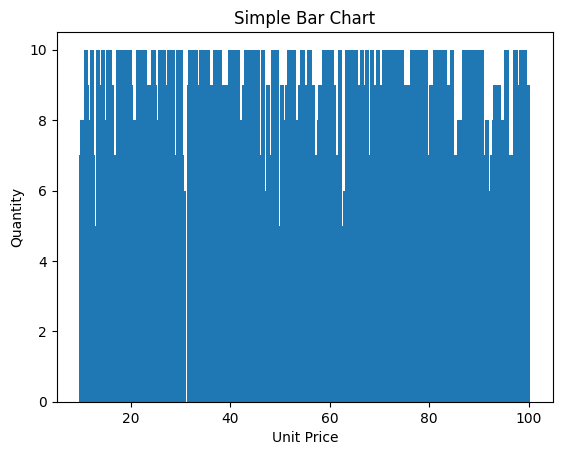

In [27]:
plt.bar(data['Unit price'],data['Quantity'])
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.title('Simple Bar Chart')

# Covariance and Correlation

In [28]:
columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total','Rating']
covariance_matrix = np.cov(data[columns], rowvar=False)
print(covariance_matrix)

[[ 7.01965331e+02  8.34778478e-01  1.96668340e+02  4.13003514e+03
  -3.99667519e-01]
 [ 8.34778478e-01  8.54644645e+00  2.41495704e+01  5.07140978e+02
  -7.94564565e-02]
 [ 1.96668340e+02  2.41495704e+01  1.37096594e+02  2.87902848e+03
  -7.33300277e-01]
 [ 4.13003514e+03  5.07140978e+02  2.87902848e+03  6.04595980e+04
  -1.53993058e+01]
 [-3.99667519e-01 -7.94564565e-02 -7.33300277e-01 -1.53993058e+01
   2.95351823e+00]]


In [29]:
columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total','Rating']
correlation = data[columns].corr()
correlation

,Unit price,Quantity,Tax 5%,Total,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,1.000000


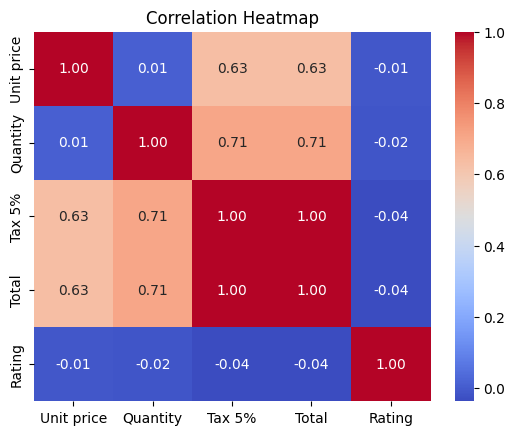

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Hypothesis Testing

In [31]:
from scipy import stats
t_statistic, p_value = stats.ttest_ind(data['Unit price'], data['Quantity'])

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in sales between the two strategies.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in sales between the two strategies.")

t-statistic: 59.510051852604406
p-value: 0.0
Reject null hypothesis: There is a significant difference in sales between the two strategies.


In [32]:
t_statistic, p_value = stats.ttest_ind(data['Unit price'], data['Tax 5%'])

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in sales between the two strategies.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in sales between the two strategies.")

t-statistic: 43.987575028825816
p-value: 3.8136673806304974e-296
Reject null hypothesis: There is a significant difference in sales between the two strategies.


# Exploratory Data Analysis

1. which category of product is highly rated ?

In [33]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


In [34]:
demand = data[data['Rating']>8]['Product line'].value_counts()
demand

Product line
Food and beverages        60
Fashion accessories       57
Health and beauty         53
Electronic accessories    49
Sports and travel         47
Home and lifestyle        42
Name: count, dtype: int64

In [35]:
demand = demand.reset_index()
demand

,Product line,count
0,Food and beverages,60
1,Fashion accessories,57
2,Health and beauty,53
3,Electronic accessories,49
4,Sports and travel,47
5,Home and lifestyle,42


In [36]:
fig = go.Figure(data=[go.Pie(labels=demand['Product line'],values=demand['count'])])

fig.show()

Here we can observe that out fashion accessories are highly rated among other categories and this means we should incorporate more fashion related items to increase our everyday sales as out fashion accessories is in demand and good as well

In [37]:
indemand = data[(data['Rating']>6) & (data['Rating']<8)]['Product line'].value_counts()
indemand = indemand.reset_index()
indemand

,Product line,count
0,Fashion accessories,62
1,Sports and travel,61
2,Electronic accessories,58
3,Home and lifestyle,54
4,Food and beverages,54
5,Health and beauty,41


In [38]:
fig = go.Figure(data=[go.Pie(labels=indemand['Product line'],values=indemand['count'])])

fig.show()

In [39]:
less_demand = data[data['Rating']<6]['Product line'].value_counts()
less_demand = less_demand.reset_index()
less_demand

,Product line,count
0,Home and lifestyle,58
1,Fashion accessories,55
2,Electronic accessories,54
3,Sports and travel,51
4,Health and beauty,49
5,Food and beverages,48


In [40]:
fig = go.Figure(data=[go.Pie(labels=less_demand['Product line'],values=less_demand['count'])])

fig.show()

Here we can find which all categories we need to work more to make it much better for the user so that our sale will increase 

2. Which payment mode is mostly used by the customers ?

In [41]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


In [42]:
payment = data.groupby('Payment')
payment = payment['Payment'].value_counts()
payment = payment.reset_index()
payment

,Payment,count
0,Cash,344
1,Credit card,311
2,Ewallet,345


In [43]:
fig = go.Figure(data=[go.Pie(labels=payment['Payment'],values=payment['count'])])

fig.show()

Here we can observe that almost all 3 payment modes is used by the customers , hence no conclusion can be drawn from here but we can keep in mind the tax as well because if we observe then payment mode with ewallet and credit card have more tax applied, so maybe we can work on that thing and givr offers on credit card payment or ewallet payment so that more customet go digital and tax will be more in order increase gross income.

3. At what time, the number of customer in the supermarket is more ?

In [44]:
new_data = data
new_data

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,4.1


In [45]:
new_data['Time'] = new_data['Time'].str.replace(':','.')
new_data['Time'] = new_data['Time'].astype('float')
new_data

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13.08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10.29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13.23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20.33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10.37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13.46,Ewallet,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17.16,Ewallet,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13.22,Cash,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15.33,Cash,4.1


In [46]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Date           1000 non-null   object 
 10  Time           1000 non-null   float64
 11  Payment        1000 non-null   object 
 12  Rating         1000 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


In [47]:
new_data.sample(5)  # any random data from the datset 

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
16,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11.03,Credit card,4.6
87,A,Yangon,Member,Male,Food and beverages,49.38,7,17.2830,362.9430,3/27/2019,20.35,Credit card,7.3
173,B,Mandalay,Member,Male,Electronic accessories,52.89,6,15.8670,333.2070,1/19/2019,17.34,Credit card,9.8
202,C,Naypyitaw,Normal,Male,Electronic accessories,61.41,7,21.4935,451.3635,1/14/2019,10.02,Cash,9.8
105,A,Yangon,Member,Male,Electronic accessories,88.67,10,44.3350,931.0350,1/12/2019,14.50,Ewallet,7.3


In [48]:
fig = go.Figure(data=[go.Histogram(x=new_data['Time'], marker=dict(color='blue'), nbinsx=10)],
                layout=dict(title='Histogram', xaxis=dict(title='Time'), yaxis=dict(title='Frequency'),bargap=0.05))

fig.show()

Here we can see that the supermarket have more number of customer from 12 pm onwards, so by using this information we can manage resources.

 4. which category of items are mostly sold or mostly in demand ?

In [49]:
data.sample(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
587,A,Yangon,Normal,Female,Sports and travel,43.06,5,10.7650,226.0650,2/4/2019,16.38,Ewallet,7.7
232,B,Mandalay,Normal,Female,Health and beauty,84.09,9,37.8405,794.6505,2/11/2019,10.54,Cash,8.0
268,A,Yangon,Member,Male,Home and lifestyle,70.74,4,14.1480,297.1080,1/5/2019,16.05,Credit card,4.4
708,C,Naypyitaw,Normal,Male,Fashion accessories,15.62,8,6.2480,131.2080,1/20/2019,20.37,Ewallet,9.1
629,A,Yangon,Normal,Female,Fashion accessories,12.09,1,0.6045,12.6945,1/26/2019,18.19,Credit card,8.2
896,C,Naypyitaw,Normal,Male,Fashion accessories,60.74,7,21.2590,446.4390,1/18/2019,16.23,Ewallet,5.0
16,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11.03,Credit card,4.6
902,A,Yangon,Member,Female,Health and beauty,27.73,5,6.9325,145.5825,3/26/2019,20.21,Credit card,4.2
238,B,Mandalay,Member,Female,Electronic accessories,13.22,5,3.3050,69.4050,3/2/2019,19.26,Cash,4.3
29,A,Yangon,Normal,Male,Health and beauty,24.89,9,11.2005,235.2105,3/15/2019,15.36,Cash,7.4


In [50]:
product = data.groupby('Product line')
product = product['Product line'].value_counts()
product = product.reset_index()
product

,Product line,count
0,Electronic accessories,170
1,Fashion accessories,178
2,Food and beverages,174
3,Health and beauty,152
4,Home and lifestyle,160
5,Sports and travel,166


In [51]:
# highest selling product 
product[product['count']==product['count'].max()]

,Product line,count
1,Fashion accessories,178


In [52]:
fig = go.Figure(data=[go.Pie(labels=product['Product line'],values=product['count'])])

fig.show()

here as we can see that the 'Faschion and food accessories' is the most selling categories of product.

5. who's buys more , man or women ?

In [53]:
data.tail()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13.46,Ewallet,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17.16,Ewallet,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13.22,Cash,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15.33,Cash,4.1
999,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13.28,Cash,6.6


In [54]:
gender = data.groupby('Gender')
gender = gender['Gender'].value_counts()
gender = gender.reset_index()
gender

,Gender,count
0,Female,501
1,Male,499


In [55]:
fig = go.Figure(data=[go.Pie(labels=gender['Gender'],values=gender['count'])])

fig.show()

Here we can see that both female buys more than male.

Now lets check which category of product male buys more and female buys more 

In [56]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13.08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10.29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13.23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20.33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10.37,Ewallet,5.3


In [57]:
gender_=data.groupby('Gender')
gender_=gender_['Product line'].value_counts()
gender_ = gender_.reset_index()
gender_

,Gender,Product line,count
0,Female,Fashion accessories,96
1,Female,Food and beverages,90
2,Female,Sports and travel,88
3,Female,Electronic accessories,84
4,Female,Home and lifestyle,79
5,Female,Health and beauty,64
6,Male,Health and beauty,88
7,Male,Electronic accessories,86
8,Male,Food and beverages,84
9,Male,Fashion accessories,82


In [58]:
female = gender_[gender_['Gender'] == 'Female']
female

,Gender,Product line,count
0,Female,Fashion accessories,96
1,Female,Food and beverages,90
2,Female,Sports and travel,88
3,Female,Electronic accessories,84
4,Female,Home and lifestyle,79
5,Female,Health and beauty,64


In [59]:
male = gender_[gender_['Gender'] == 'Male']
male

,Gender,Product line,count
6,Male,Health and beauty,88
7,Male,Electronic accessories,86
8,Male,Food and beverages,84
9,Male,Fashion accessories,82
10,Male,Home and lifestyle,81
11,Male,Sports and travel,78


In [60]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=female['Product line'], values=female['count'], name='Female'), 1, 1)
fig.add_annotation(
    x=0.16,
    y=-0.2,
    text="Female",
    showarrow=False,
    font=dict(size=20)
)
fig.add_trace(go.Pie(labels=male['Product line'], values=male['count'], name='Male'), 1, 2)
fig.add_annotation(
    x=0.82,
    y=-0.2,
    text="Male",
    showarrow=False,
    font=dict(size=20)
)

fig.update_layout(title_text="Product Line Distribution by Gender")

6. who buys more , member or normal customer ?

In [61]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13.08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10.29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13.23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20.33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10.37,Ewallet,5.3


In [62]:
customer = data.groupby('Customer type')
customer = customer['Customer type'].value_counts()
customer = customer.reset_index()
customer

,Customer type,count
0,Member,501
1,Normal,499


In [63]:
fig = go.Figure(data=go.Pie(labels=customer['Customer type'],values=customer['count']))

fig.show()

In [64]:
customer_ = data.groupby('Customer type')
customer_ = customer_['Product line'].value_counts()
customer_= customer_.reset_index()
customer_

,Customer type,Product line,count
0,Member,Food and beverages,94
1,Member,Sports and travel,87
2,Member,Fashion accessories,86
3,Member,Home and lifestyle,83
4,Member,Electronic accessories,78
5,Member,Health and beauty,73
6,Normal,Electronic accessories,92
7,Normal,Fashion accessories,92
8,Normal,Food and beverages,80
9,Normal,Health and beauty,79


In [65]:
member = customer_[customer_['Customer type'] =='Member']
member

,Customer type,Product line,count
0,Member,Food and beverages,94
1,Member,Sports and travel,87
2,Member,Fashion accessories,86
3,Member,Home and lifestyle,83
4,Member,Electronic accessories,78
5,Member,Health and beauty,73


In [66]:
normal = customer_[customer_['Customer type'] =='Normal']
normal

,Customer type,Product line,count
6,Normal,Electronic accessories,92
7,Normal,Fashion accessories,92
8,Normal,Food and beverages,80
9,Normal,Health and beauty,79
10,Normal,Sports and travel,79
11,Normal,Home and lifestyle,77


In [67]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=member['Product line'], values=member['count'], name='Members'), 1, 1)
fig.add_annotation(
    x=0.16,
    y=-0.2,
    text="Members",
    showarrow=False,
    font=dict(size=20)
)
fig.add_trace(go.Pie(labels=normal['Product line'], values=normal['count'], name='Normal'), 1, 2)
fig.add_annotation(
    x=0.82,
    y=-0.2,
    text="Normal",
    showarrow=False,
    font=dict(size=20)
)

fig.update_layout(title_text="Product Line Distribution by Customer Type")

7.which branch is performing well ?

In [68]:
data.head(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13.08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10.29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13.23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20.33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10.37,Ewallet,5.3
5,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18.30,Ewallet,4.1
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14.36,Ewallet,5.8
7,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11.38,Ewallet,8.0
8,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17.15,Credit card,7.2
9,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13.27,Credit card,5.9


In [69]:
A = data[data['Branch'] == 'A']
A

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13.08,Ewallet,9.1
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13.23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20.33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10.37,Ewallet,5.3
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14.36,Ewallet,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19.06,Credit card,4.5
992,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20.46,Ewallet,8.8
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13.22,Cash,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15.33,Cash,4.1


In [70]:
len = A.shape[0]
len

340

In [71]:
for index, row in A.iterrows():
    A.at[index, 'result'] = row['Unit price'] * row['Quantity']

total_cost = A['result'].sum()


/tmp/ipykernel_18/947050459.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
print("Total cost:", total_cost)

Total cost: 101143.20999999999


In [73]:
total_sell = A['Total'].sum()
total_sell

106200.3705

In [74]:
profit = total_sell-total_cost
profit= (profit*100)/total_cost
profit

5.000000000000013

In [75]:
A_p = A['Product line'].value_counts()
A_p = A_p.reset_index()
A_p

,Product line,count
0,Home and lifestyle,65
1,Electronic accessories,60
2,Sports and travel,59
3,Food and beverages,58
4,Fashion accessories,51
5,Health and beauty,47


In [76]:
fig = go.Figure(data=go.Pie(labels=A_p['Product line'],values=A_p['count']))

fig.show()

In [77]:
bar = go.Bar(
    x=A_p['Product line'], 
    y=A_p['count'],         
    marker_color='blue'     
)

fig = go.Figure(data=[bar])

fig.show()


Here we can see that Home and Lifestyle has more sell in Branch "A" 

In [78]:
B = data[data['Branch'] == 'B']
B

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
9,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13.27,Credit card,5.9
10,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18.07,Ewallet,4.5
11,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,3/9/2019,17.03,Cash,6.8
15,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16.19,Cash,4.5
19,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,3/11/2019,15.30,Ewallet,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.800,520.800,1/3/2019,19.08,Credit card,6.2
989,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.148,633.108,1/28/2019,15.46,Credit card,8.4
991,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.300,804.300,1/24/2019,18.10,Ewallet,6.0
993,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.745,183.645,2/22/2019,18.35,Ewallet,6.6


In [79]:
l=B.shape[0]
l

332

In [80]:
for index, row in B.iterrows():
    B.at[index, 'result'] = row['Unit price'] * row['Quantity']


s = B['result'].reset_index()
s = s.drop(columns={'index'})
cost = s['result'].sum()


/tmp/ipykernel_18/669742637.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
cost

101140.64

In [82]:
sell = B['Total'].sum()
sell

106197.67199999999

In [83]:
p = sell - cost
p = (p*100)/cost
p

4.999999999999992

In [84]:
B_p = B['Product line'].value_counts()
B_p = B_p.reset_index()
B_p

,Product line,count
0,Fashion accessories,62
1,Sports and travel,62
2,Electronic accessories,55
3,Health and beauty,53
4,Food and beverages,50
5,Home and lifestyle,50


In [85]:
bar = go.Bar(
    x=B_p['Product line'], 
    y=B_p['count'],         
    marker_color='Red'     
)

fig = go.Figure(data=[bar])

fig.show()

Here we can see that 'Fashion Accessories' has more sell in Branch "B"

In [86]:
C = data[data['Branch'] == 'C']
C


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10.29,Cash,9.6
5,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18.30,Ewallet,4.1
7,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11.38,Ewallet,8.0
20,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2/25/2019,11.24,Ewallet,4.8
34,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2/6/2019,10.42,Ewallet,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10.33,Cash,6.1
984,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11.40,Cash,6.0
988,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19.12,Ewallet,4.3
994,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11.40,Ewallet,5.9


In [87]:
lc=C.shape[0]
lc

328

In [88]:
for index, row in C.iterrows():
    C.at[index, 'result'] = row['Unit price'] * row['Quantity']


s_ = C['result'].reset_index()
s_ = s_.drop(columns={'index'})
c = s_['result'].sum()


/tmp/ipykernel_18/2801792690.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
c

105303.53

In [90]:
s = C['Total'].sum()
s

110568.7065

In [91]:
pro = s-c
pro = (pro*100)/c
pro

5.000000000000002

In [92]:
C_p = C['Product line'].value_counts()
C_p = C_p.reset_index()
C_p

,Product line,count
0,Food and beverages,66
1,Fashion accessories,65
2,Electronic accessories,55
3,Health and beauty,52
4,Home and lifestyle,45
5,Sports and travel,45


In [93]:
bar = go.Bar(
    x=C_p['Product line'], 
    y=C_p['count'],         
    marker_color='Green'     
)

fig = go.Figure(data=[bar])

fig.show()

Here we can see that 'Food and bevarages' has more sell in Branch "c"

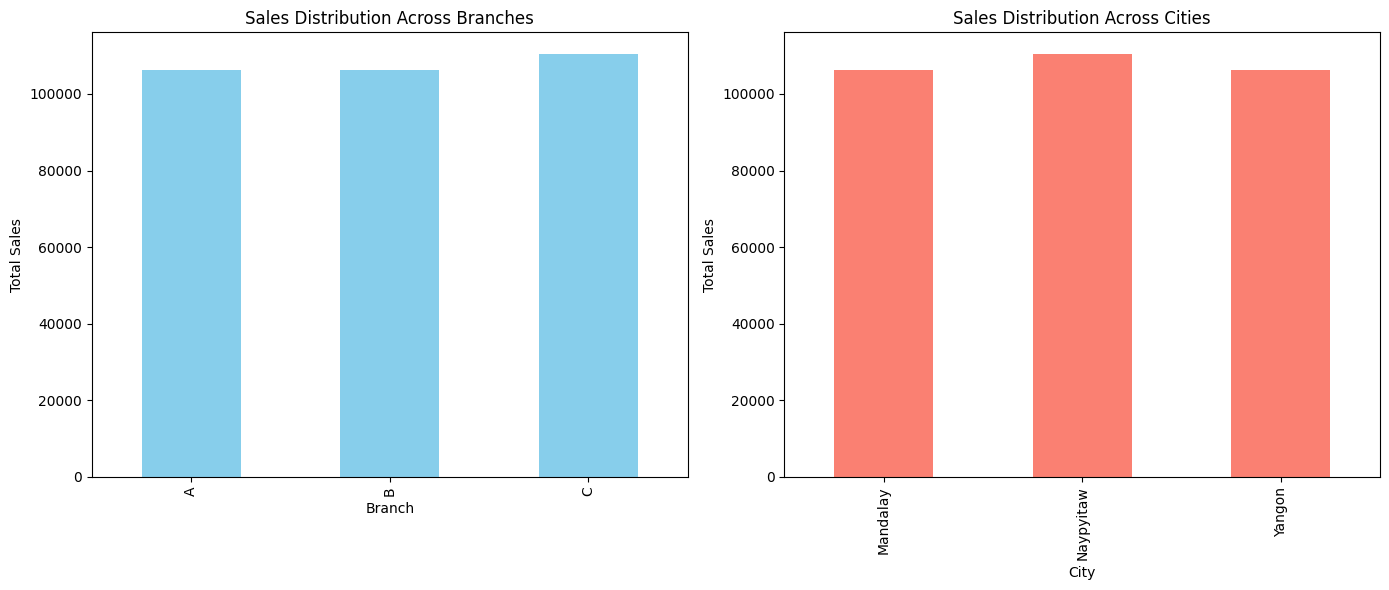

In [94]:
branch_sales = data.groupby('Branch')['Total'].sum()
city_sales = data.groupby('City')['Total'].sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

branch_sales.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Sales Distribution Across Branches')
axes[0].set_xlabel('Branch')
axes[0].set_ylabel('Total Sales')

city_sales.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Sales Distribution Across Cities')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

# ML Model 

In [95]:
data

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13.08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10.29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13.23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20.33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10.37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13.46,Ewallet,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17.16,Ewallet,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13.22,Cash,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15.33,Cash,4.1


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Date           1000 non-null   object 
 10  Time           1000 non-null   float64
 11  Payment        1000 non-null   object 
 12  Rating         1000 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


In [97]:
# data['Customer type'] = data['Customer type'].replace({'Member': 1, 'Normal': 2},inplace=False)
# data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 2},inplace=False)
data['Product line'] = data['Product line'].replace({'Health and beauty': 1, 'Electronic accessories': 2,'Home and lifestyle':3,
                                              'Sports and travel':4,'Food and beverages':5,'Fashion accessories':6},inplace=False)

data

/tmp/ipykernel_18/3383448529.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,1,74.69,7,26.1415,548.9715,1/5/2019,13.08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,2,15.28,5,3.8200,80.2200,3/8/2019,10.29,Cash,9.6
2,A,Yangon,Normal,Male,3,46.33,7,16.2155,340.5255,3/3/2019,13.23,Credit card,7.4
3,A,Yangon,Member,Male,1,58.22,8,23.2880,489.0480,1/27/2019,20.33,Ewallet,8.4
4,A,Yangon,Normal,Male,4,86.31,7,30.2085,634.3785,2/8/2019,10.37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,1,40.35,1,2.0175,42.3675,1/29/2019,13.46,Ewallet,6.2
996,B,Mandalay,Normal,Female,3,97.38,10,48.6900,1022.4900,3/2/2019,17.16,Ewallet,4.4
997,A,Yangon,Member,Male,5,31.84,1,1.5920,33.4320,2/9/2019,13.22,Cash,7.7
998,A,Yangon,Normal,Male,3,65.82,1,3.2910,69.1110,2/22/2019,15.33,Cash,4.1


In [98]:
data_ = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv',usecols=['Unit price','Quantity','Tax 5%','Rating'])
data_

,Unit price,Quantity,Tax 5%,Rating
0,74.69,7,26.1415,9.1
1,15.28,5,3.8200,9.6
2,46.33,7,16.2155,7.4
3,58.22,8,23.2880,8.4
4,86.31,7,30.2085,5.3
...,...,...,...,...
995,40.35,1,2.0175,6.2
996,97.38,10,48.6900,4.4
997,31.84,1,1.5920,7.7
998,65.82,1,3.2910,4.1


<Axes: xlabel='Unit price', ylabel='Tax 5%'>

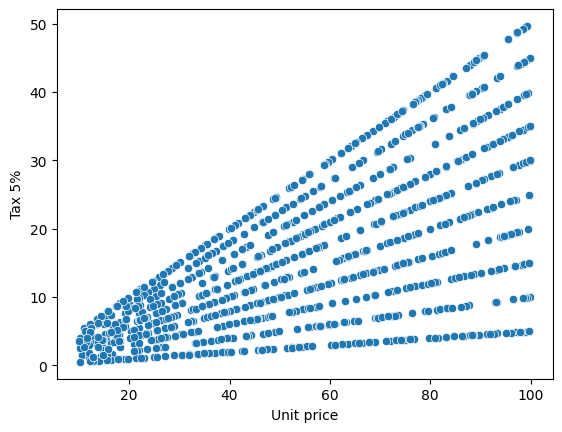

In [99]:
sns.scatterplot(data=data, x='Unit price', y='Tax 5%')

<Axes: xlabel='Unit price', ylabel='Rating'>

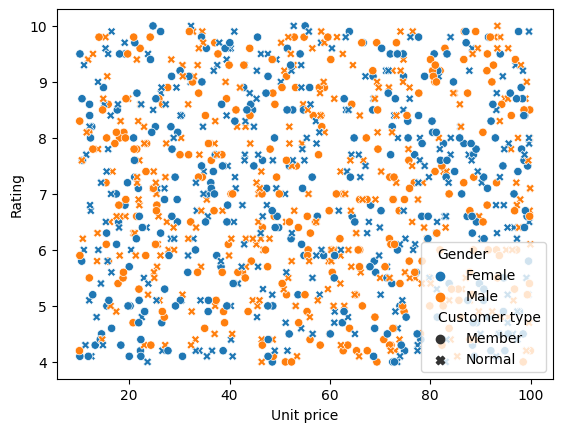

In [100]:
sns.scatterplot(data=data, x='Unit price', y='Rating',hue='Gender',style='Customer type')

# Predicting Tax 

Linear Regression Model 

In [101]:
X=data_.iloc[:,0:1]
X

,Unit price
0,74.69
1,15.28
2,46.33
3,58.22
4,86.31
...,...
995,40.35
996,97.38
997,31.84
998,65.82


In [102]:
y = data_.iloc[:,-2]
y

0      26.1415
1       3.8200
2      16.2155
3      23.2880
4      30.2085
        ...   
995     2.0175
996    48.6900
997     1.5920
998     3.2910
999    30.9190
Name: Tax 5%, Length: 1000, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [104]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [105]:
X_test

,Unit price
890,83.66
694,52.60
798,92.78
147,66.14
858,57.59
...,...
150,91.54
279,44.02
544,71.20
568,79.86


In [106]:
X_test['Unit price'].max()

99.96

In [107]:
y_test

890    20.915
694    23.670
798     4.639
147    13.228
858    17.277
        ...  
150    18.308
279    22.010
544     3.560
568    27.951
911    11.226
Name: Tax 5%, Length: 200, dtype: float64

In [108]:
X_test.iloc[4]

Unit price    57.59
Name: 858, dtype: float64

In [109]:
# User Input is Required 

# price = float(input('Enter price of the product : '))
# price = int(price)
# lr.predict(X_test.iloc[price].values.reshape(1,1))

Random Forest Regressor Model 

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



X = data_.drop('Tax 5%', axis=1)  
y = data_['Tax 5%']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean absloute Error:", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error",rmse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean absloute Error: 0.2124997249999982
Mean Squared Error: 0.11626589609912384
Root Mean Squared Error 0.34097785279857085
R-squared (R2): 0.9992118960453797


i am getting this much high accuracy is beause of the dataset is very clean and having very few outliers. 

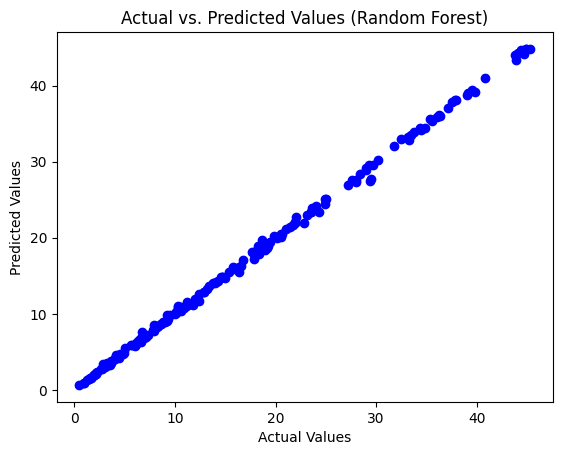

In [111]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.show()

In [112]:
# For Now this will not work as user input is not given 


# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# user_input = []
# for feature in X_train.columns:
#     value = input(f"Enter value for {feature}: ")
#     user_input.append(float(value)) 

# user_input = np.array(user_input).reshape(1, -1)  # Reshape to match the model's input shape

# prediction = rf_model.predict(user_input)

# print("Tax Prediction =", int(prediction[0]),'%')